<a href="https://colab.research.google.com/github/enzogostadebolo/Medical-Cost-Prediction/blob/main/Medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de negócio



Os dados a seguir, obtidos do Kaggle, explicam o custo de uma pequena amostra do Custo de Seguro Médico da população dos EUA com base em alguns atributos descritos.




<h1> Entendendo variáveis</h1>

<b>age</b>: Idade do beneficiário principal

<p><b>sex</b>: Genêro do contratante(M/F)</p>

<p><b>bmi</b>: índice de massa, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg / m ^ 2) usando a relação altura / peso, idealmente 18,5 a 24,9</p>

<p><b>children</b>: Número de filhos cobertos por seguro de saúde / Número de dependentes</p>

<p><b>smoker</b>: Informa se o contratante fuma ou não</p>

<p><b>region</b>: A área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.</p>

<p><b>charges</b>: Custos médicos individuais cobrados pelo seguro de saúde</p>

# Análise exploratória

In [ ]:
#Importanto as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Carregando o dataset
df_url = "https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"
df = pd.read_csv(df_url)

In [ ]:
#Exibindo as primeiras entradas 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Tamanho do dataset (linhas, colunas)
df.shape

(1338, 7)

In [ ]:
#Verificando se há NaNs
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Informações do dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Descrevendo os dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
#Descrevendo dados categóricos
df.describe(include=["O"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


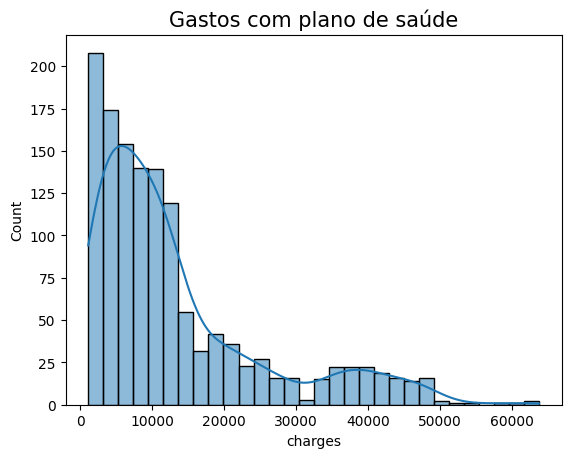

In [88]:
#Exibindo um histplot para conhecer melhor a variável target(charges)
sns.histplot(data=df, x="charges", kde=True)
plt.title("Gastos com plano de saúde", fontsize=15)
plt.show()

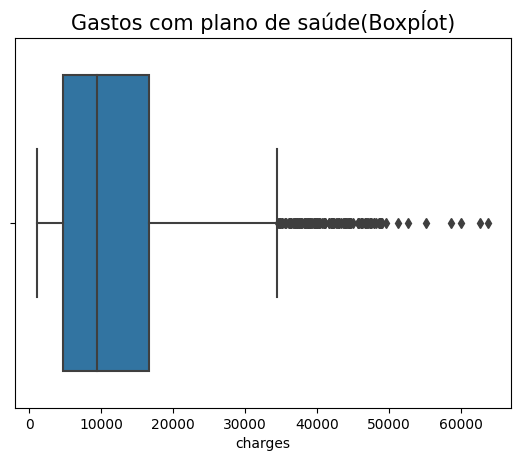

In [89]:
#Exibindo um boxplot para reconhecer outliers
sns.boxplot(data=df, x="charges")
plt.title("Gastos com plano de saúde(Boxpĺot)", fontsize=15)
plt.show()

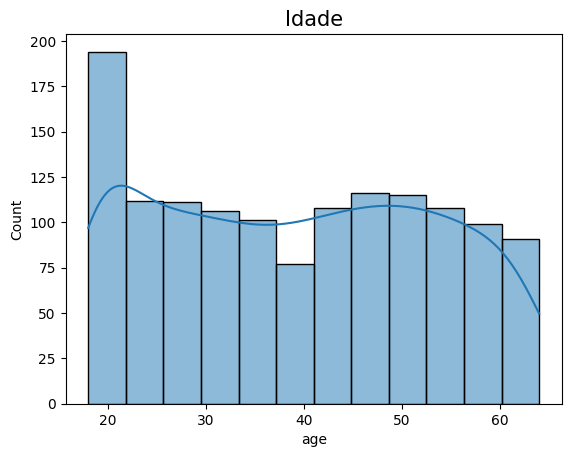

In [90]:
#Exibindo um histplot para conhecer melhor a variável age
sns.histplot(data=df, x="age", kde=True)
plt.title("Idade", fontsize=15)
plt.show()

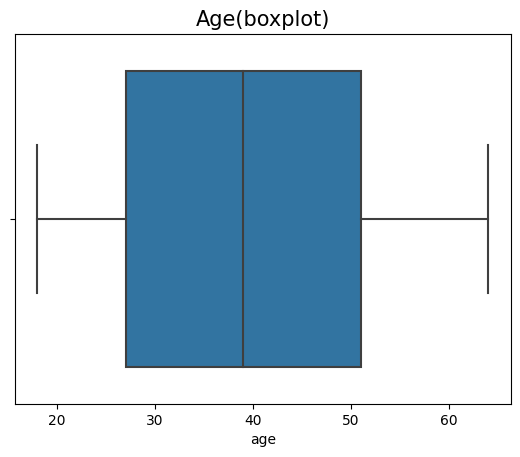

In [91]:
#Exibindo um boxplot para reconhecer outliers
sns.boxplot(data=df, x="age")
plt.title("Age(boxplot)", fontsize=15)
plt.show()

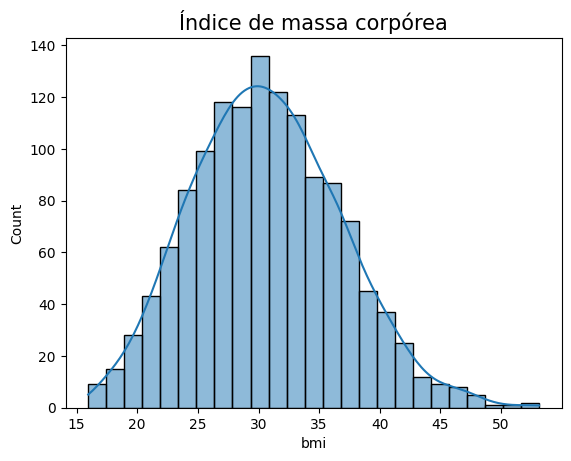

In [92]:
#Exibindo um histplot para conhecher melhor a variável bmi
sns.histplot(data=df, x="bmi", kde=True)
plt.title("Índice de massa corpórea", fontsize=15)
plt.show()


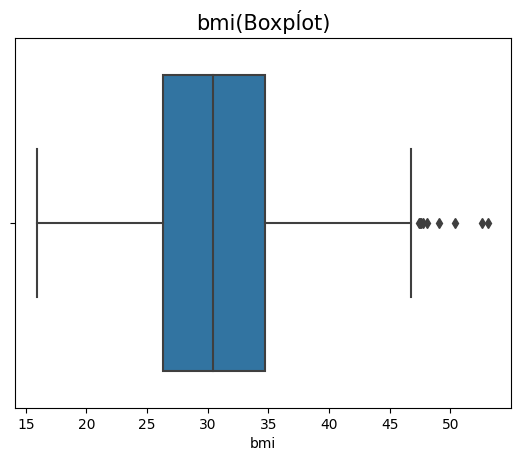

In [93]:
#Exibindo um boxplot para reconhecer outliers
sns.boxplot(data=df, x="bmi")
plt.title("bmi(Boxpĺot)", fontsize=15)
plt.show()

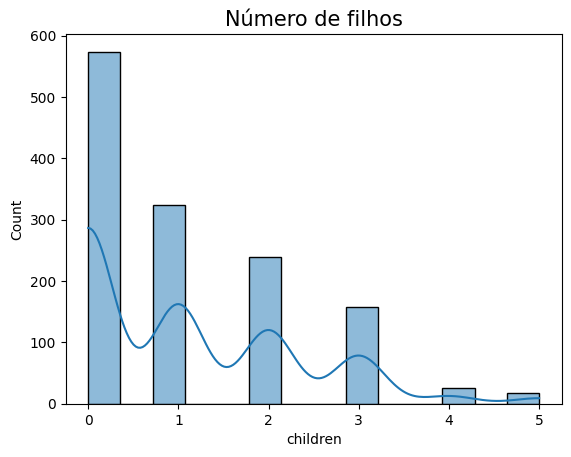

In [ ]:
sns.histplot(data=df, x="children", kde=True)
plt.title("Número de filhos", fontsize=15)
plt.show()

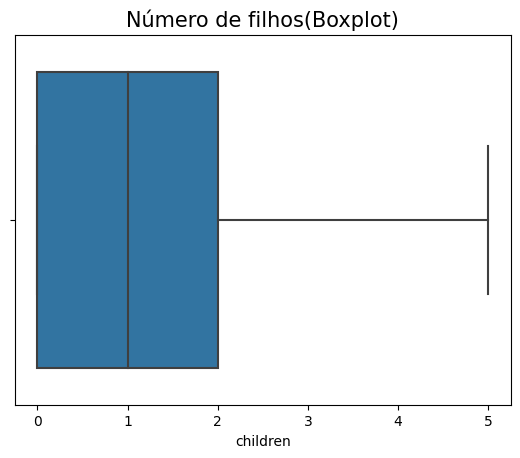

In [ ]:
sns.boxplot(data=df, x="children")
plt.title("Número de filhos(Boxplot)", fontsize=15)
plt.show()

Male: 676
Female: 662


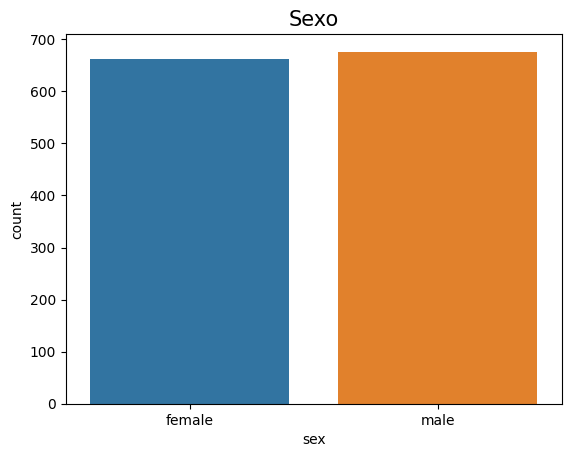

In [ ]:
#Contagem do sexo
print(f"Male: {df['sex'].value_counts()[0]}")
print(f"Female: {df['sex'].value_counts()[1]}")

sns.countplot(data=df, x="sex")
plt.title("Sexo", fontsize=15)
plt.show()

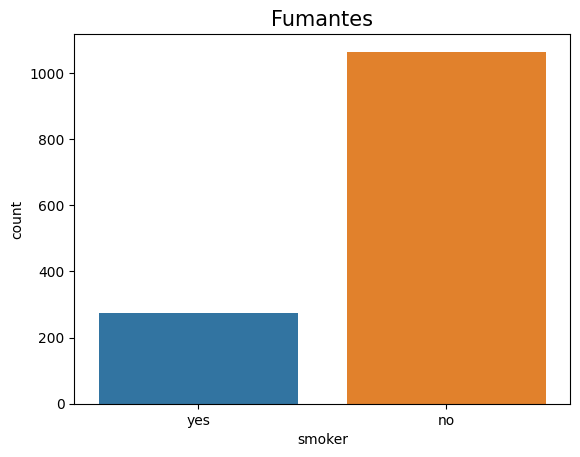

In [ ]:
#Contagem de fumantes/não fumantes
sns.countplot(data=df, x="smoker")
plt.title("Fumantes", fontsize=15)
plt.show()

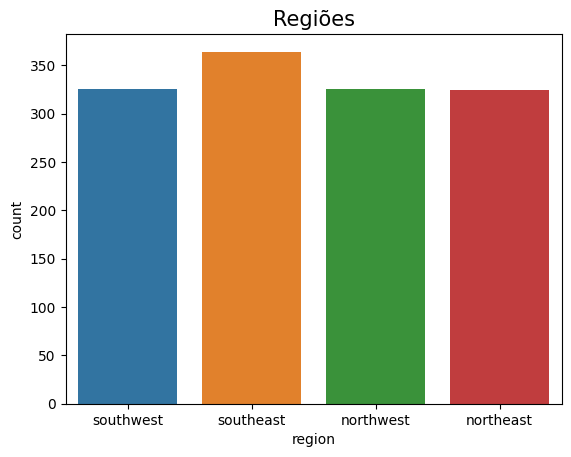

In [ ]:
#Contagem regiões
sns.countplot(data=df, x="region")
plt.title("Regiões", fontsize=15)
plt.show()

# Pré processamento de dados

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Transformando variáveis em numéricas
df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Separando a variável target
X = df.drop(["charges"], axis=1)
y = df["charges"]

In [ ]:
#Importação do train_test_split para separar dados de treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
#Separando dados de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Construção e avaliação da máquina preditiva


In [94]:
#importando métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

<h1>Regressão Linear</h1>

In [ ]:
#Importação do modelo
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

#Predição
y_pred = linear_regression.predict(X_test)

#Avaliação do modelo
print("R2 score -> ", r2_score(y_test, y_pred))
print("Mean squared error -> ", mean_squared_error(y_test, y_pred))

R2 score ->  0.7623311844057112
Mean squared error ->  35479352.80730364


<h1>Regressão Ridge</h1> 



In [83]:
#Importação do modelo
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#Predição
y_pred = ridge.predict(X_test)

#Avaliação do modelo
print("R2 score -> ", r2_score(y_test, y_pred))
print("Mean squared error -> ", mean_squared_error(y_test, y_pred))

R2 score ->  0.7622717485361213
Mean squared error ->  35488225.43193179


<h1>Regressão Lasso</h1> 

In [84]:
#Importação do modelo
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

#Predição
y_pred = lasso.predict(X_test)

#Avaliação do modelo
print("R2 score -> ", r2_score(y_test, y_pred))
print("Mean squared error -> ", mean_squared_error(y_test, y_pred))

R2 score ->  0.7623218871127373
Mean squared error ->  35480740.71314543


<h1>Regressão ElasticNet</h1> 

In [85]:
#Importação do modelo
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_test, y_test)

#Predição
y_pred = elastic_net.predict(X_test)

#Avaliação do modelo
print("R2 score -> ", r2_score(y_test, y_pred))
print("Mean squared error -> ", mean_squared_error(y_test, y_pred))

R2 score ->  0.5399329869234399
Mean squared error ->  68679097.97560287


<h1>Regressão random forest</h1> 

In [87]:
#Importação do modelo
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

#Predição
y_pred = random_forest_regressor.predict(X_test)

#Avaliação do modelo
print("R2 score -> ", r2_score(y_test, y_pred))
print("Mean squared error -> ", mean_squared_error(y_test, y_pred))

R2 score ->  0.8558602316758347
Mean squared error ->  21517276.808691084


# Salvando modelo 

In [95]:
import pickle
filename = "MedicalCostPrediction.pkl"
pickle.dump(random_forest_regressor, open(filename, "wb"))